# Import Modules

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import widgets, interact
%matplotlib inline

# Generate Time Sequence
This section of code will generate a 1-D time sequence with ```n_block``` blocks of sequence, where each block is composed of 3 pure-tone sinusoidal function. You can play with the parameters by setting different frequencies and amplitudes for each of the pure tone.

Text(0, 0.5, 'signal')

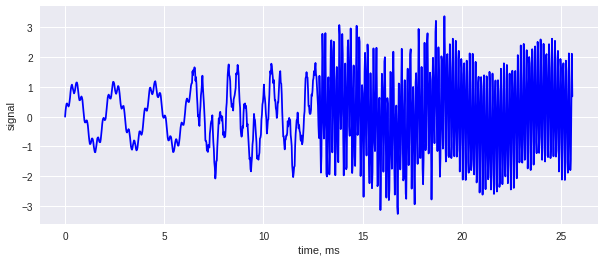

In [2]:
#sequence parameters
N       = 1024   #length of signal
Nseg    = 512    #length of each time block
n_block = 3      #number of time blocks
Noverlap= (n_block*Nseg-N)//(n_block-1) # length of overlap between time blocks
fs      = 40000  #Hz
t_block = np.arange(0, Nseg)/fs # time index of each block
t       = np.arange(0, N)/fs # time index

#amplitudes and frequencies at the first time block
a0_t0 = 1.0
f0_t0 = 500    #Hz
a1_t0 = 0.01
f1_t0 = 15000  #Hz
a2_t0 = 0.2
f2_t0 = 3800   #Hz

#amplitudes and frequencies at the second time block
a0_t1 = 0.8
f0_t1 = 2300   #Hz
a1_t1 = 0.1
f1_t1 = 15800  #Hz
a2_t1 = 0.1
f2_t1 = 10000  #Hz

#amplitudes and frequencies at the third time block
a0_t2 = 2.0
f0_t2 = 7000   #Hz
a1_t2 = 0.3
f1_t2 = 12800  #Hz
a2_t2 = 0.55
f2_t2 = 200    #Hz

signal = np.zeros(N, );
for block_index in range(n_block):
    for freq_index in range(3):
        exec("signal[block_index*(Nseg-Noverlap):block_index*(Nseg-Noverlap)+Nseg]+=a{:d}_t{:d}*np.sin(2*np.pi*f{:d}_t{:d}*t_block)".format(freq_index, block_index, freq_index, block_index))
        
w, h = plt.figaspect(0.4)
plt.figure(figsize=(w, h))
plt.plot(1000*t, signal, "b")
plt.xlabel("time, ms")
plt.ylabel("signal")

# Zero-padding and Windowing
This section of code will generate plots of your original sequence and its corresponding spectrum (log-scale). You will be able to tune the factor of zero-padding (3 times means zero-pad 2N points) and type of window functions (rect, hanning, and kaiser) to see how its spectrum change.

In [5]:
filters = ({"name":"rect", "function":np.ones}, {"name":"hanning", "function":np.hanning}, {"name":"kaiser", "function":np.kaiser})
def padZeros(pad_factor, filter_index):
    signal_pad      = np.zeros(N*pad_factor, )
    if filter_index<2:
        signal_pad[:N]  = signal*filters[filter_index]["function"](N)
    else:
        signal_pad[:N]  = signal*filters[filter_index]["function"](N, 10)
    Nf              = signal_pad.shape[0]
    t_pad           = np.arange(0, Nf)/fs
    signal_freq     = np.fft.fft(signal_pad)[:Nf//2]
    signal_freq_max = np.max(np.abs(signal_freq))
    signal_freq     = np.abs(signal_freq)/signal_freq_max
    f_pad           = np.arange(0, Nf//2)/(Nf//2)*(fs/2)
    
    w, h = plt.figaspect(0.5)
    plt.figure(figsize=(w, h))
    plt.subplot(211)
    plt.plot(t_pad*1000, signal_pad, "b")
    plt.title("{:s} window".format(filters[filter_index]["name"]))
    plt.xlabel("time, ms")
    plt.ylabel("signal")
    plt.subplot(212)
    plt.plot(f_pad, 20*np.log10(signal_freq), "b")
    plt.xlabel("frequency, Hz")
    plt.ylabel("spectrum, dB")
    
interact(padZeros, pad_factor=widgets.IntSlider(min=1, max=10,step=2,value=1), filter_index=widgets.IntSlider(min=0, max=2,step=1,value=0));

interactive(children=(IntSlider(value=1, description='pad_factor', max=10, min=1, step=2), IntSlider(value=0, …

# STFT
This section of the code plots the short-time Fourier transform of your original sequence. You can decrease the size of each time window by increasing ```time_seg```, meaning you segment the original time sequence into more pieces. By doing so, you could clearly see the trade-off. In addition, you can also see the effect of window function type on STFT by selecting different window functions with the knob. 

In [7]:
filters = ({"name":"rect", "function":np.ones}, {"name":"hanning", "function":np.hanning}, {"name":"kaiser", "function":np.kaiser})
def sTFT(time_seg, filter_index):
    Nwindow         = N//time_seg
    time_freq_image = np.zeros((N//2, time_seg))
    for time_index in range(time_seg):
        signal_pad      = np.zeros(N, )
        if filter_index<2:
            signal_pad[:Nwindow] = signal[time_index*Nwindow:(time_index+1)*Nwindow]*filters[filter_index]["function"](Nwindow)
        else:
            signal_pad[:Nwindow] = signal[time_index*Nwindow:(time_index+1)*Nwindow]*filters[filter_index]["function"](Nwindow, 10)
        
        signal_freq     = np.fft.fft(signal_pad)[:N//2]
        signal_freq_max = np.max(np.abs(signal_freq))
        signal_freq     = np.abs(signal_freq)/signal_freq_max
        time_freq_image[:, time_index] = 20*np.log10(signal_freq)
    
    w, h = plt.figaspect(0.4)
    plt.figure(figsize=(w, h))
    plt.imshow(time_freq_image[::-1, :], cmap="gray", extent=(0, N/fs*1000, 0, fs//2), aspect='auto', clim=(-60, 0))
    plt.title("time-frequency analysis, {:s} window, window size = {:d}".format(filters[filter_index]["name"], Nwindow))
    plt.xlabel("time, ms")
    plt.ylabel("frequency, Hz")
    
interact(sTFT, time_seg=widgets.IntSlider(min=1, max=50,step=5,value=1), filter_index=widgets.IntSlider(min=0, max=2,step=1,value=0));

interactive(children=(IntSlider(value=1, description='time_seg', max=50, min=1, step=5), IntSlider(value=0, de…